In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [4]:
class Measurement(Base):
    __tablename__ = "Measurement"
    id = Column(Integer, primary_key= True)
    station = Column(String)
    date = Column(String)
    prcp = Column(Float)
    tobs = Column(Float)
    
class station(Base):
    __tablename__ = "station"
    id = Column(Integer,primary_key= True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [6]:
base= automap_base()
base.prepare(engine, reflect=True)
base.classes.keys()


['measurement', 'station']

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:

Measurement=base.classes.measurement

session.query(Measurement.date, Measurement.prcp).all()


[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [9]:

measurement=base.classes.measurement

In [10]:
station=base.classes.station 

In [11]:

session=Session(engine)

In [12]:
print(measurement)

<class 'sqlalchemy.ext.automap.measurement'>


In [13]:
print(station)

<class 'sqlalchemy.ext.automap.station'>


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
year = session.query(func.max(Measurement.date)).scalar()
year

'2017-08-23'

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Measurementquery=session.execute("SELECT date, prcp FROM measurement WHERE date >= '2016-08-23'").fetchall()
Measurementquery


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:

Precip2_df = pd.DataFrame(Measurementquery, columns=['date', 'prcp'])
Precip2_df=Precip2_df.sort_values (by=['date'])
Precip2_df


,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


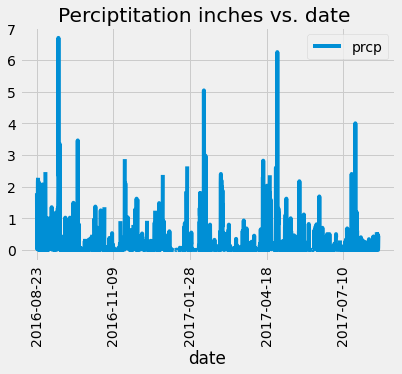

In [17]:

Precip2_df.plot(x='date', y='prcp')
plt.xticks(rotation=90)
# Set a title for the chart
plt.title("Perciptitation inches vs. date ")

plt.show()


In [18]:
# Perform a query to retrieve the data and precipitation scores
weather_date=session.query(measurement).\
    filter(measurement.date & measurement.prcp)
weather_date

In [19]:
results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).\
    order_by(measurement.id.desc()).all()
results

[(19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (19545, 'USC00516128', '2017-08-18', None, 76.0),
 (19544, 'USC00516128', '2017-08-17', 0.13, 72.0),
 (19543, 'USC00516128', '2017-08-16', 0.42, 71.0),
 (19542, 'USC00516128', '2017-08-15', 0.42, 70.0),
 (19541, 'USC00516128', '2017-08-14', 0.22, 79.0),
 (19540, 'USC00516128', '2017-08-13', None, 80.0),
 (19539, 'USC00516128', '2017-08-12', 0.14, 74.0),
 (19538, 'USC00516128', '2017-08-11', None, 72.0),
 (19537, 'USC00516128', '2017-08-10', 0.07, 75.0),
 (19536, 'USC00516128', '2017-08-09', 0.15, 71.0),
 (19535, 'USC00516128', '2017-08-08', 0.34, 74.0),
 (19534, 'USC00516128', '2017-08-07', 0.05, 78.0),
 (19533, 'USC00516128', '2017-08-06', None, 79.0),
 (19532, 'USC00516128', '2017-08-05', None, 77.0),
 (19531, 'USC00516128', '2017-08

In [20]:

# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_df = pd.DataFrame(results, columns=['id', 'station', 'date','prcp', 'tobs'])

Precip_df.set_index('date', inplace=True, )
Precip_df.sort_values (by=['date'], ascending=False).head(10) 




,id,station,prcp,tobs
date,,,,
2017-08-23,19550,USC00516128,0.45,76.0
2017-08-23,12187,USC00519523,0.08,82.0
2017-08-23,7635,USC00514830,0.00,82.0
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-22,19549,USC00516128,0.50,76.0
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-22,2723,USC00519397,0.00,82.0
2017-08-21,19548,USC00516128,0.56,76.0
2017-08-21,7634,USC00514830,0.02,79.0


In [21]:
results3 = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs)
results3

In [22]:
stations_pd= pd.DataFrame(results, columns=['id','station','date','prcp','tobs'])
stations_pd.head(20)

,id,station,date,prcp,tobs
0,19550,USC00516128,2017-08-23,0.45,76.0
1,19549,USC00516128,2017-08-22,0.50,76.0
2,19548,USC00516128,2017-08-21,0.56,76.0
3,19547,USC00516128,2017-08-20,NaN,78.0
4,19546,USC00516128,2017-08-19,0.09,71.0
5,19545,USC00516128,2017-08-18,NaN,76.0
6,19544,USC00516128,2017-08-17,0.13,72.0
7,19543,USC00516128,2017-08-16,0.42,71.0
8,19542,USC00516128,2017-08-15,0.42,70.0
9,19541,USC00516128,2017-08-14,0.22,79.0


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_df.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
stationsunique=session.query(func.count(station.station)).all()
print(stationsunique)

[(9,)]


In [25]:
results2 = session.query(station.id,station.station, station.name, station.latitude, station.longitude, station.elevation).all()
results2

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [26]:

stations= pd.DataFrame(results2, columns=['id', 'station', 'name','latitude','longitude', 'elevation'])

stations.sort_values (by=["station"], ascending=False).head(10)      


,id,station,name,latitude,longitude,elevation
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


Station_Group=(Precip_df).groupby("station")
print(Station_Group)
Station_Group["station"].count()
Station_pd=pd.DataFrame({"Count":Station_Group["station"].count()})
Station_pd.sort_values(by='Count', ascending=False).head(10)          

,Count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.execute("SELECT tobs FROM measurement WHERE station = 'USC00519281'").fetchall()


[(70.0,),
 (62.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (69.0,),
 (66.0,),
 (70.0,),
 (75.0,),
 (64.0,),
 (60.0,),
 (61.0,),
 (68.0,),
 (64.0,),
 (66.0,),
 (67.0,),
 (70.0,),
 (67.0,),
 (67.0,),
 (69.0,),
 (60.0,),
 (75.0,),
 (75.0,),
 (65.0,),
 (75.0,),
 (69.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (72.0,),
 (67.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (66.0,),
 (69.0,),
 (61.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (61.0,),
 (68.0,),
 (67.0,),
 (62.0,),
 (65.0,),
 (69.0,),
 (63.0,),
 (62.0,),
 (61.0,),
 (64.0,),
 (72.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),


In [29]:

session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.execute("SELECT tobs FROM measurement WHERE date >= '2016-08-23'").fetchall()

[(81.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (80.0,),
 (81.0,),
 (80.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (81.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (82.0,),
 (81.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (75.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (80.0,),
 (81.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (76.0,),
 (75.0,),
 (68.0,),
 (75.0,),


In [31]:
results4 =session.query(measurement.tobs, measurement.prcp, measurement.date).\
    filter(measurement.station == 'USC00519281').all()
results4
Station_pd=pd.DataFrame({"Count":Station_Group["station"].count()})
Station_pd.sort_values(by='Count', ascending=False).head(10)      

,Count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [32]:
stations_pd= pd.DataFrame(results, columns=['id','station','date','prcp','tobs'])
stations_pd.head(20)
Station_pd.sort_values(by='Count', ascending=False).head(10)   

,Count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [33]:
results = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()
plot_df = pd.DataFrame(results, columns=['tobs','date'])
plot_df

,tobs,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


In [34]:
max=session.query(func.max(measurement.tobs),func.min(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

In [35]:
max

[(85.0, 54.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

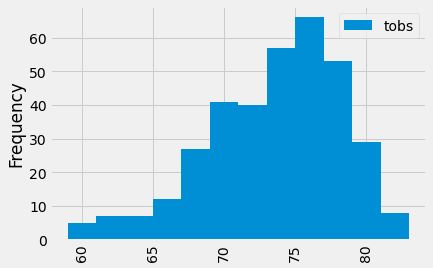

In [36]:

plot_df.plot.hist(xlabel='tobs',ylabel='frequency',bins=12 ,rot=90)

# Close session

In [37]:
# Close Session
session.close()

In [ ]:
-d